In [1]:
#import necessary libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
from matplotlib.legend_handler import HandlerLine2D
from sklearn.metrics import r2_score
from sklearn.ensemble import RandomForestRegressor

In [2]:
#import and confirm dataset1
d1 = pd.read_csv("D1.csv")
d1.head()

weather_datetime      solar_datetime  solarRadiation  uvHigh  \
0  2020-02-07 14:29:00  2020-02-07 14:29:1          627.70     7.0   
1  2020-02-07 14:34:00  2020-02-07 14:34:1          617.31     7.0   
2  2020-02-07 14:39:00  2020-02-07 14:39:1          608.13     6.0   
3  2020-02-07 14:44:00  2020-02-07 14:44:1          582.57     6.0   
4  2020-02-07 14:49:00  2020-02-07 14:49:1          571.67     6.0   

   winddirAvg  humidityHigh  humidityLow  humidityAvg  qcStatus  tempHigh  \
0         195            24           24           24        -1        65   
1         129            24           23           23        -1        68   
2         108            24           23           23        -1        68   
3          87            25           24           24        -1        67   
4          38            24           24           24        -1        66   

   ...  windchillAvg  heatindexHigh  heatindexLow  heatindexAvg  pressureMax  \
0  ...            65             65            65            65        30.06   
1  ...            67             68            66            67        30.06   
2  ...            67             68            67            67        30.06   
3  ...            66             67            66            66        30.06   
4  ...            66             66            66            66        30.05   

   pressureMin  pressureTrend  precipRate  precipTotal      DC  
0        30.05           0.60         0.0          0.0  42.036  
1        30.05          -0.15         0.0          0.0  42.126  
2        30.05           0.00         0.0          0.0  42.264  
3        30.05          -0.15         0.0          0.0  42.204  
4        30.04          -0.15         0.0          0.0  42.360  

[5 rows x 29 columns]

In [3]:
#import and confirm dataset1
d2 = pd.read_csv("D2.csv")
d2.head()

weather_datetime   solar_datetime  solarRadiation  uvHigh  winddirAvg  \
0  3/30/2020 21:54  3/30/2020 21:54             0.0       0         153   
1  3/30/2020 21:59  3/30/2020 21:59             0.0       0         158   
2  3/30/2020 22:04  3/30/2020 22:04             0.0       0         185   
3  3/30/2020 22:09  3/30/2020 22:09             0.0       0         155   
4  3/30/2020 22:14  3/30/2020 22:14             0.0       0         167   

   humidityHigh  humidityLow  humidityAvg  qcStatus  tempHigh  ...  \
0            26           25           25         1        62  ...   
1            25           25           25         1        62  ...   
2            26           25           25         1        62  ...   
3            26           25           25         1        61  ...   
4            26           25           25         1        62  ...   

   windchillHigh  windchillAvg  heatindexHigh  heatindexLow  heatindexAvg  \
0             62            62             62            62            62   
1             62            62             62            62            62   
2             62            61             62            61            61   
3             61            61             61            61            61   
4             62            61             62            61            61   

   pressureMax  pressureMin  pressureTrend  precipRate  precipTotal  
0        30.25        30.24            0.0           0            0  
1        30.25        30.25            0.0           0            0  
2        30.25        30.24            0.0           0            0  
3        30.25        30.24            0.0           0            0  
4        30.25        30.25            0.0           0            0  

[5 rows x 28 columns]

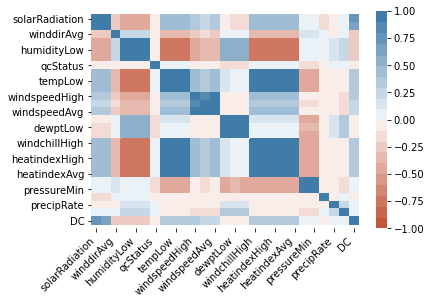

In [4]:
# Corrilation Chart
d1Corr = d1.corr()
ax = sns.heatmap(
    d1Corr, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 240, n=20), #color data
    square=False
)
ax.set_ylim(len(d1Corr)+0.5, -0.5) # move label ticks to align better
ax.set_xticklabels( # rotate botom label ticks
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
)

plt.show()

In [5]:
dc_corr = d1Corr["DC"].drop(labels=["DC"])
dc_corr

solarRadiation    0.701945
uvHigh            0.665372
winddirAvg       -0.280851
humidityHigh     -0.243070
humidityLow      -0.249210
humidityAvg      -0.247262
qcStatus         -0.100838
tempHigh          0.325501
tempLow           0.319308
tempAvg           0.322341
windspeedHigh     0.302366
windgustLow       0.219940
windspeedAvg      0.276677
dewptHigh        -0.033934
dewptLow         -0.055491
dewptAvg         -0.044666
windchillHigh     0.325648
windchillAvg      0.321638
heatindexHigh     0.321846
heatindexLow      0.314918
heatindexAvg      0.318261
pressureMax       0.043609
pressureMin       0.043092
pressureTrend    -0.029149
precipRate        0.003305
precipTotal       0.052842
Name: DC, dtype: float64

In [6]:
# returns a list of columns used for predictor values. Takes a float and 
# will return all column keys with a correlation with a greater value then specified
def column_list(sig_val=0.0):
    columns = []
    for key in dc_corr.keys():
        if abs(dc_corr[key]) >= sig_val:
            columns.append(key)
    return columns
# test column_list()
columns = column_list()
print(columns)

['solarRadiation', 'uvHigh', 'winddirAvg', 'humidityHigh', 'humidityLow', 'humidityAvg', 'qcStatus', 'tempHigh', 'tempLow', 'tempAvg', 'windspeedHigh', 'windgustLow', 'windspeedAvg', 'dewptHigh', 'dewptLow', 'dewptAvg', 'windchillHigh', 'windchillAvg', 'heatindexHigh', 'heatindexLow', 'heatindexAvg', 'pressureMax', 'pressureMin', 'pressureTrend', 'precipRate', 'precipTotal']


In [7]:
# Functuon splits data set into separate data sets.
def test_train_split(data,split):
  msk = np.random.rand(len(data)) < split
  train = data[msk]
  test = data[~msk]
  return train, test

In [8]:
# Split data into traing and test into at most 80% for training
d1_train, d1_test = test_train_split(d1, 0.6)

In [9]:
# get X and Y values, using all columns for predictors
X_train = pd.DataFrame(d1_train, columns= columns)
Y_train = d1_train.DC
X_test = pd.DataFrame(d1_test, columns= columns)
Y_test = d1_test.DC

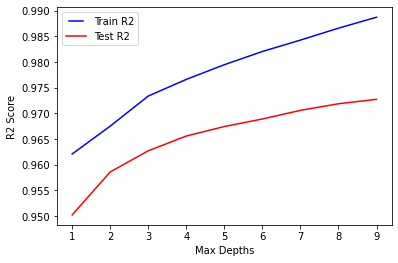

In [10]:
# Visualize how max depth affects R^2 of model
max_depths = list(range(1,10))
train_results = []
test_results = []
for max_depth in max_depths:
    model_rf = RandomForestRegressor(n_estimators=100, max_depth = max_depth)
    model_rf.fit(X_train, Y_train)
    train_pred = model_rf.predict(X_train)
    test_pred = model_rf.predict(X_test)
    train_results.append(r2_score(Y_train, train_pred))
    test_results.append(r2_score(Y_test, test_pred))
line1, = plt.plot(max_depths, train_results,'b', label="Train R2")
line2, = plt.plot(max_depths, test_results, 'r', label="Test R2")
plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
plt.ylabel('R2 Score')
plt.xlabel('Max Depths')
plt.show()

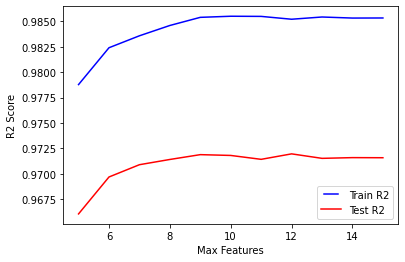

In [11]:
# See How Max features affects R^2 of model, Max depth of 7 chosen based on previous visualization
max_features_split = list(range(5,16))
train_results = []
test_results = []
for max_features in max_features_split:
    model_rf = RandomForestRegressor(n_estimators=100, max_depth = 7, max_features = max_features)
    model_rf.fit(X_train, Y_train)
    train_pred = model_rf.predict(X_train)
    test_pred = model_rf.predict(X_test)
    train_results.append(r2_score(Y_train, train_pred))
    test_results.append(r2_score(Y_test, test_pred))
line1, = plt.plot(max_features_split, train_results,'b', label="Train R2")
line2, = plt.plot(max_features_split, test_results, 'r', label="Test R2")
plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
plt.ylabel('R2 Score')
plt.xlabel('Max Features')
plt.show()

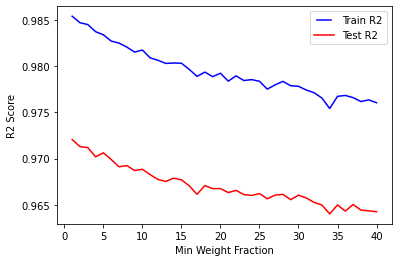

In [12]:
min_samples_leafs = list(range(1,41))
train_results = []
test_results = []
for min_samples_leaf in min_samples_leafs:
    model_rf = RandomForestRegressor(n_estimators=100, max_depth = 7, max_features = 10, min_samples_leaf = min_samples_leaf) 
    model_rf.fit(X_train, Y_train)
    train_pred = model_rf.predict(X_train)
    test_pred = model_rf.predict(X_test)
    train_results.append(r2_score(Y_train, train_pred))
    test_results.append(r2_score(Y_test, test_pred))
from matplotlib.legend_handler import HandlerLine2D
line1, = plt.plot(min_samples_leafs, train_results,'b', label="Train R2")
line2, = plt.plot(min_samples_leafs, test_results, 'r', label="Test R2")
plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
plt.ylabel('R2 Score')
plt.xlabel('Min Weight Fraction')
plt.show()

In [13]:
#RF model. Training and testing split.
# *Play around with values as d2 results change on codalab
rf = RandomForestRegressor(n_estimators=1000, max_depth = 5, max_features = 15, min_samples_leaf = 30)
rf.fit(X_train,Y_train) 
pred_train_rf= rf.predict(X_train)
print("Train R^2 score", r2_score(Y_train, pred_train_rf))

pred_test_rf = model_rf.predict(X_test)
print("Test R^2 score", r2_score(Y_test, pred_test_rf))

Train R^2 score 0.9762282086827287
Test R^2 score 0.9642541040879784


In [14]:
#RF model trained with entire D1 dataset. 
# *Play around with values as d2 results change on codalab
rf = RandomForestRegressor(n_estimators=2000, max_depth = 8, max_features = 20,min_samples_leaf = 30)
rf.fit(pd.DataFrame(d1, columns= columns), d1.DC) 
pred_train_rf= rf.predict(pd.DataFrame(d1, columns= columns))
print(r2_score(d1.DC, pred_train_rf))

0.9768316837826817


In [15]:
# Create file for d2 Guesses
a_file = open("answer.txt", "w")

In [16]:
# Predict DC values for D2 dataset and write to answer.txt
# rf may come from model fit with entire d1, or train data. Run cell for model you want

d2_predictors = pd.DataFrame(d2, columns= columns)
predicted_d2DC = rf.predict(d2_predictors)
np.savetxt("answer.txt", predicted_d2DC, fmt='%f')